In [1]:
import MeCab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"] = "IPAexGothic"


## 第60問 単語ベクトルの読み込みと表示

In [2]:
import gensim
#単語ベクトルを扱う上では、上のgensimが楽らしい
#主な用途はNLPなどなど

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin",binary="True")
model["United_States"]
print(model["United_States"])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 第61問 単語の類似度

In [13]:
cos_US = model.similarity("United_States","U.S.")
print(cos_US)

0.73107743


## 第62問 類似度の高い単語10件

In [15]:
cos_US_top10 = model.most_similar("United_States",topn=10)
print(cos_US_top10)

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370391845703), ('United_Sates', 0.74007248878479), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019070148468018)]


## 第63問 加法構成性によるアナロジー

In [16]:
cos_Spain_top10 = model.most_similar(positive=["Spain","Athens"],negative=["Madrid"],topn=10)
print(cos_Spain_top10)

[('Greece', 0.6898481249809265), ('Aristeidis_Grigoriadis', 0.5606848001480103), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862693786621), ('Hrysopiyi_Devetzi', 0.5248444676399231), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166866183280945), ('Iraklion', 0.5146791934967041)]


## 第64問 アナロジーデータでの実験

In [19]:
with open("questions-words.txt","r",encoding="utf-8_sig") as f:

    texts = f.readlines() #リスト形式で返すのは、readlines()
                          #バイト形式で返すのが、read(),1行だけなのがreadline()

with open("result64.txt","w",encoding="utf-8_sig") as g:
    
    for text in texts:
        words = text.split()
        #文頭の行は処理しないためのif文
        if len(words) == 4:
            answer = model.most_similar(positive=[words[1],words[2]],negative=[words[0]])[0]
            #ここでのanswer=[("Greece",0.68....)]となっているハズ
            answer1 = answer[0] #単語
            answer2 = answer[1] #コサイン類似度
            words += [answer1,str(answer2)]
            out = " ".join(words) + "\n"
        else:
            out = text
        
        g.write(out)

## 第65問 アナロジータスクの正解率

In [21]:
with open("result64.txt","r",encoding="utf-8_sig") as f:
    texts = f.readlines()
    
    #意味的アナロジーと文法的アナロジーの正解率は
    #前問で求めた「そのベクトルと類似度が一番高い」モノと
    #ファイルの1行の一番最後の単語が一緒かどうかを、判断
    
    count = 0
    
    for text in texts:
        words = text.split()
        
        if len(words) == 6:
            if words[3] == words[4]:
                count += 1
        
    print(count/len(texts))

0.735351262910318


## 第66問 WordSimilarity-353での評価

In [37]:
df = pd.read_csv("wordsim353/combined.csv")
s = []

for i in range(len(df)):
    line = df.iloc[i] #locと機能は同じ(要素を選択する)だが、ilocは行番号・列番号で指定できる(locはラベル名)
    s.append(model.similarity(line["Word 1"],line["Word 2"]))
df["w2v"] = s
#相関係数はpd.corr
df[["Human (mean)","w2v"]].corr(method="spearman")
df.to_csv("result65.csv",encoding="utf-8_sig")

In [38]:
print(df[["Human (mean)","w2v"]].corr(method="spearman"))

              Human (mean)       w2v
Human (mean)      1.000000  0.700017
w2v               0.700017  1.000000


## 第67問 K-Meansクラスタリング

In [39]:
from sklearn.cluster import KMeans

In [87]:
#まずは、国名のリストを作成
#とってくるところは、アナロジーのquestion-words.txtの2,4列目部分から

with open("questions-words.txt","r",encoding="utf-8_sig") as f:

    texts = f.readlines() #リスト形式で返すのは、readlines()
                          #バイト形式で返すのが、read(),1行だけなのがreadline()
    country = []
    
    #途中で国名が2,4⇒1,3列目に変わるので、その番号を取得しておく
    for i,text in enumerate(texts):
        words = text.split()
        if words[1] == "family":
            break
        else:
            if words[1] == "currency":
                s = i
            if words[1] == "city-in-state":
                t = i
    
    #得た変数値をフラグにして、そこからとそれまでの処理を分ける
    for i,text in enumerate(texts):
        words = text.split()
        if words[1] == "family":
            break
        else:
            if len(words) == 4:
                if i < s:
                    country.append(words[1])
                    country.append(words[3])
                elif (s < i) & (i < t):
                    country.append(words[0])
                    country.append(words[2])
                
    country = list(set(country))
    
    for i,elem in enumerate(country):
        if elem == "USA":
            country[i] = "United_States"
    
    #country内の国名のmodel情報を格納
    vec = []
    
    for elem in country:
        vec.append(model[elem])
    
    #それらを学習
    kmeans = KMeans(n_clusters=5, random_state=0)
    km = kmeans.fit(vec)
    #国名に対する単語ベクトルのクラスタの予期値を出しておく
    y_km = km.fit_predict(vec)
    #まとめて表示
    for c,l in zip(country,y_km):
        print(c,l)
    

Suriname 1
Botswana 2
Bahamas 1
Liechtenstein 3
Turkmenistan 4
Syria 0
Samoa 1
Bahrain 0
Armenia 4
Thailand 1
Macedonia 3
Malta 3
Korea 1
Namibia 2
Dominica 1
China 1
Bulgaria 3
Ireland 3
Philippines 1
Tunisia 2
Ecuador 1
Italy 3
Gambia 2
United_States 1
Mauritania 2
Sweden 3
Laos 1
Cyprus 3
Angola 2
Liberia 2
Pakistan 0
Mexico 1
Fiji 1
Qatar 0
Afghanistan 0
Algeria 2
Finland 3
Lebanon 0
Burundi 2
Bangladesh 1
Spain 3
Sudan 2
Portugal 3
Zambia 2
Cuba 1
Iran 0
Hungary 3
Poland 3
Taiwan 1
Egypt 0
Vietnam 1
Montenegro 3
France 3
Germany 3
Jordan 0
Mozambique 2
Brazil 1
Serbia 3
Guyana 1
Russia 4
Niger 2
Zimbabwe 2
Eritrea 2
England 1
Canada 1
Bhutan 1
Uganda 2
Kazakhstan 4
Belarus 4
Uruguay 1
Peru 1
Greece 3
Tajikistan 4
Croatia 3
Belgium 3
Moldova 4
Gabon 2
Slovenia 3
Venezuela 1
Georgia 3
Indonesia 1
Ghana 2
Senegal 2
Argentina 1
Honduras 1
Chile 1
Tuvalu 1
Malaysia 1
Kenya 2
Kyrgyzstan 4
Oman 0
Nicaragua 1
Malawi 2
Turkey 3
Europe 3
India 1
Iraq 0
Denmark 3
Libya 0
Norway 3
Latvia 3
Es

## 第68問 Ward法のクラスタリング（デンドロ表示）

In [89]:
from scipy.cluster.hierarchy import dendrogram,linkage

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


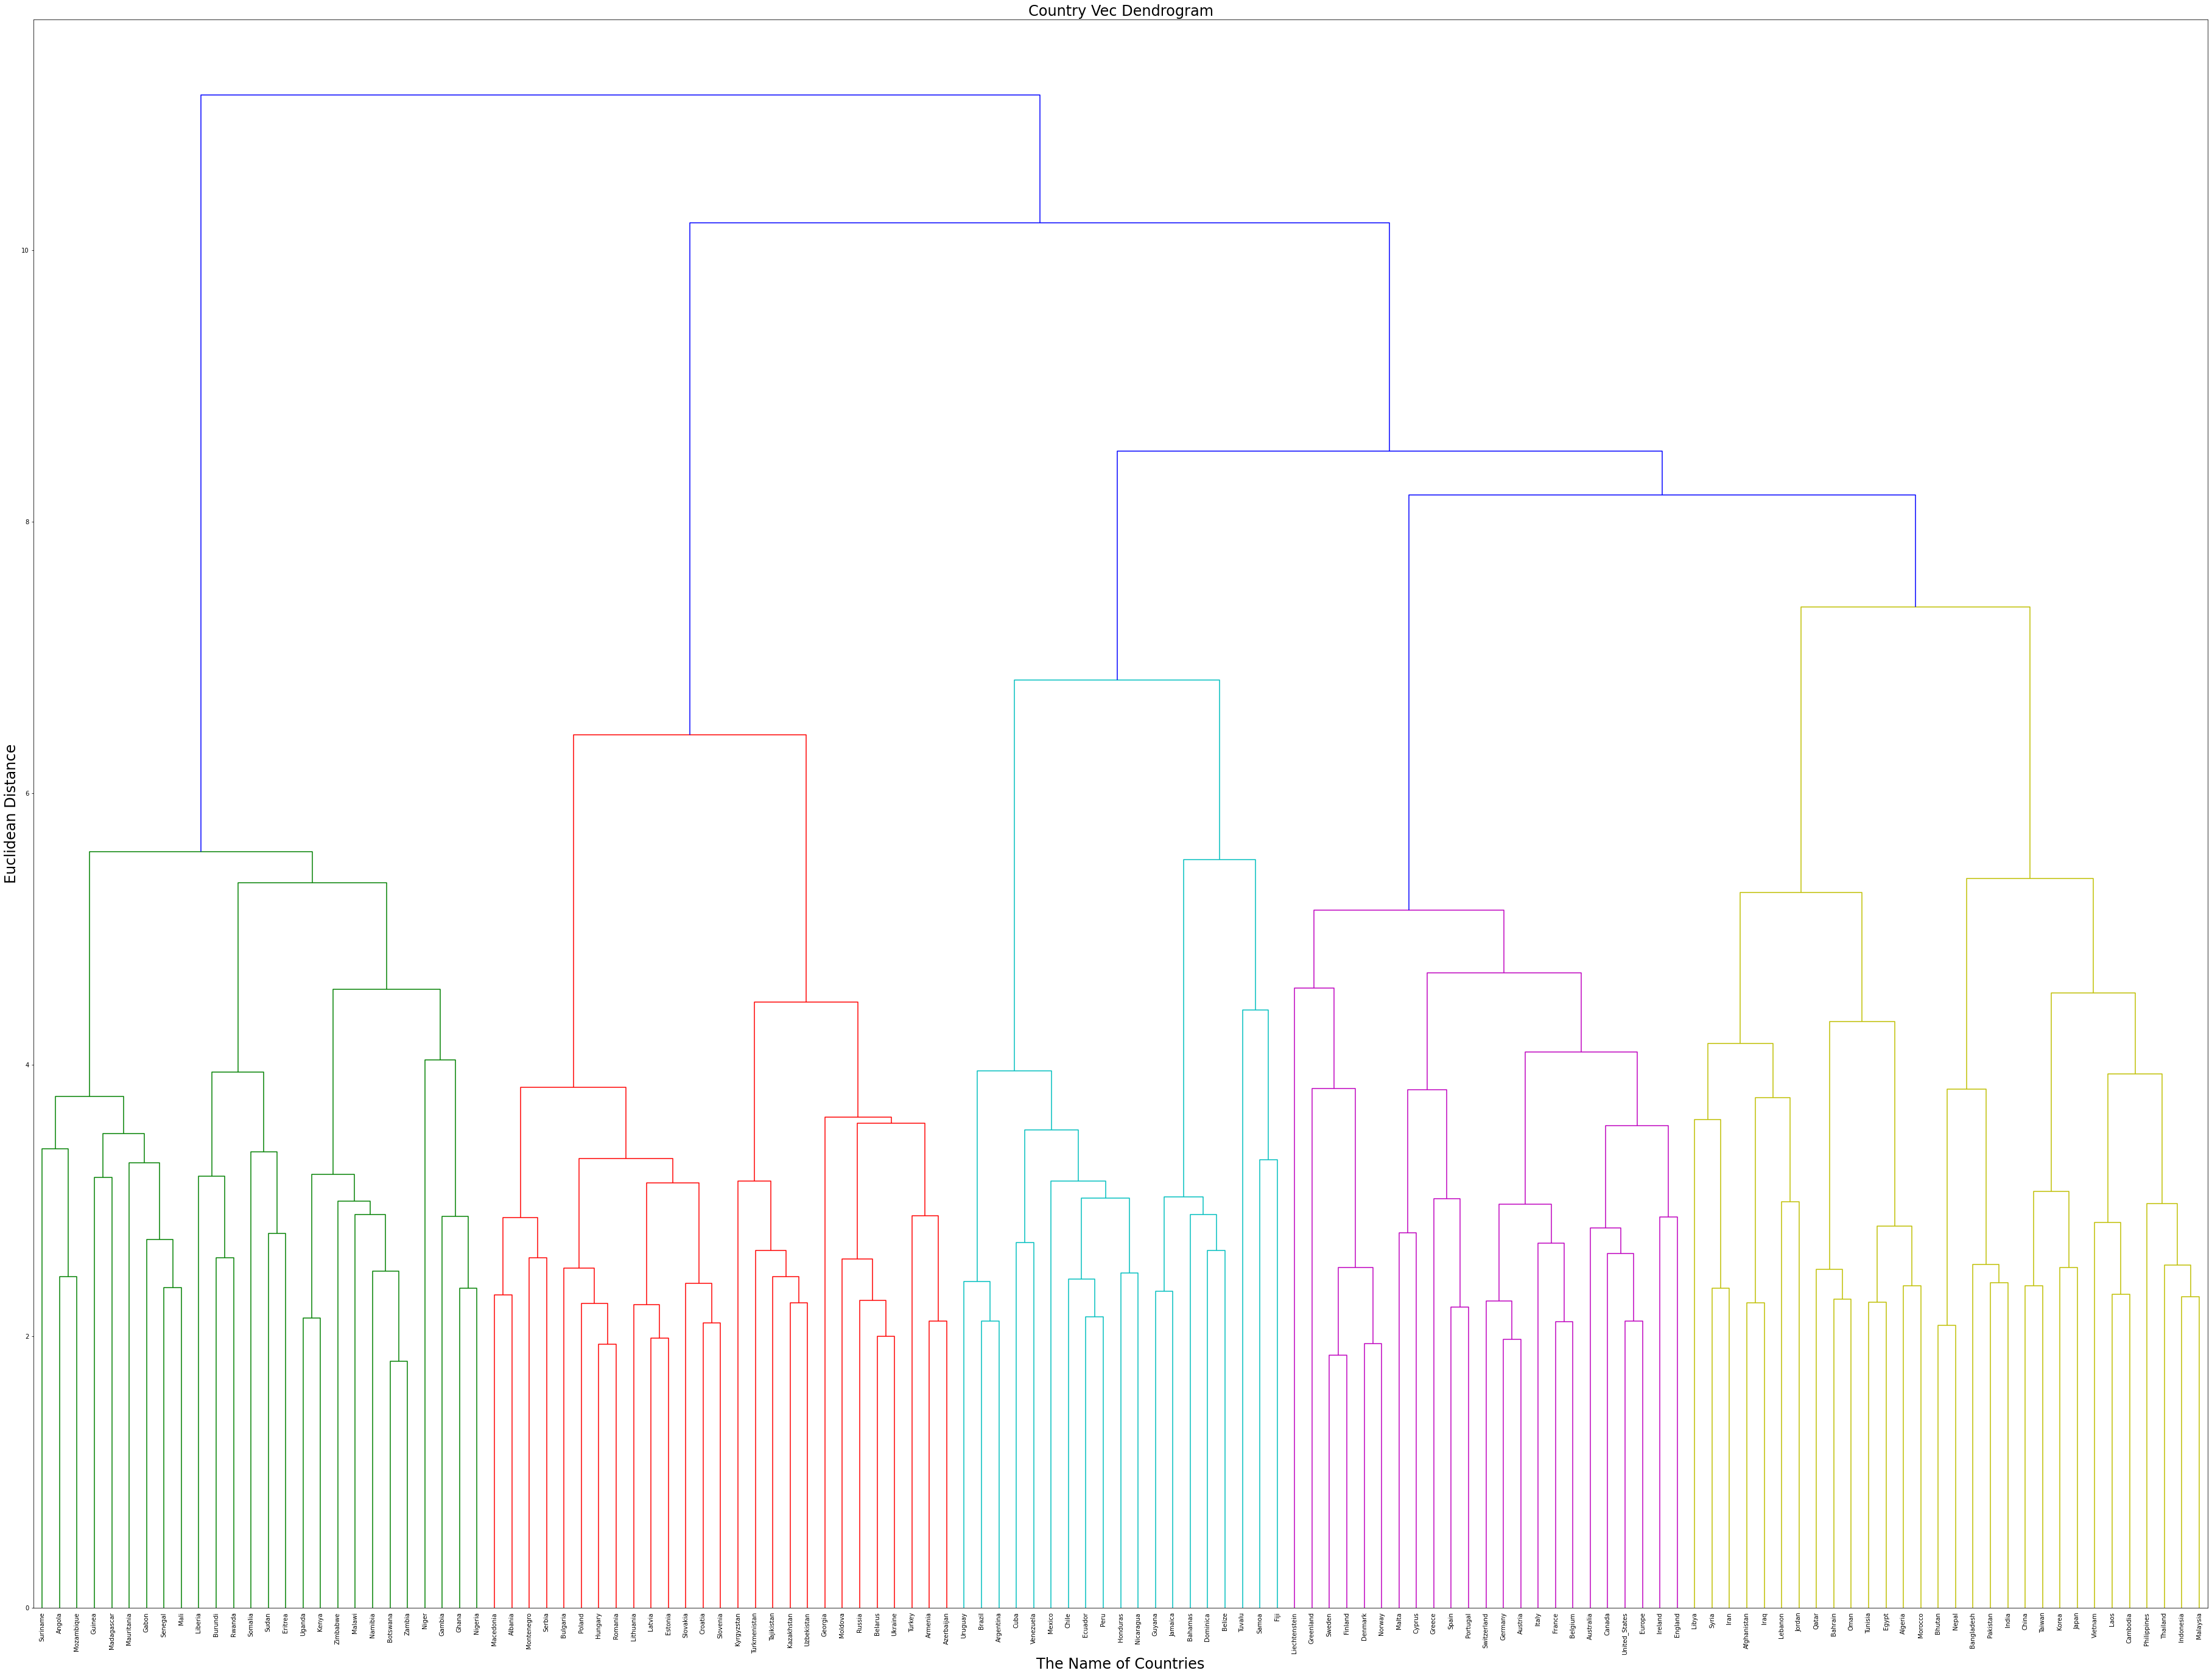

In [100]:
#pltエリアの指定
plt.figure(figsize=(64,48))
plt.title("Country Vec Dendrogram",fontsize=24)
plt.xlabel("The Name of Countries",fontsize=24)
plt.ylabel("Euclidean Distance",fontsize=24)

link_vec = linkage(vec,method="ward",metric="euclidean")
dendrogram(link_vec,labels = country,leaf_rotation=90,leaf_font_size=10)
plt.savefig("dendrogram.png")
plt.show()

## 第69問 t-SNEの可視化

In [102]:
from sklearn.manifold import TSNE

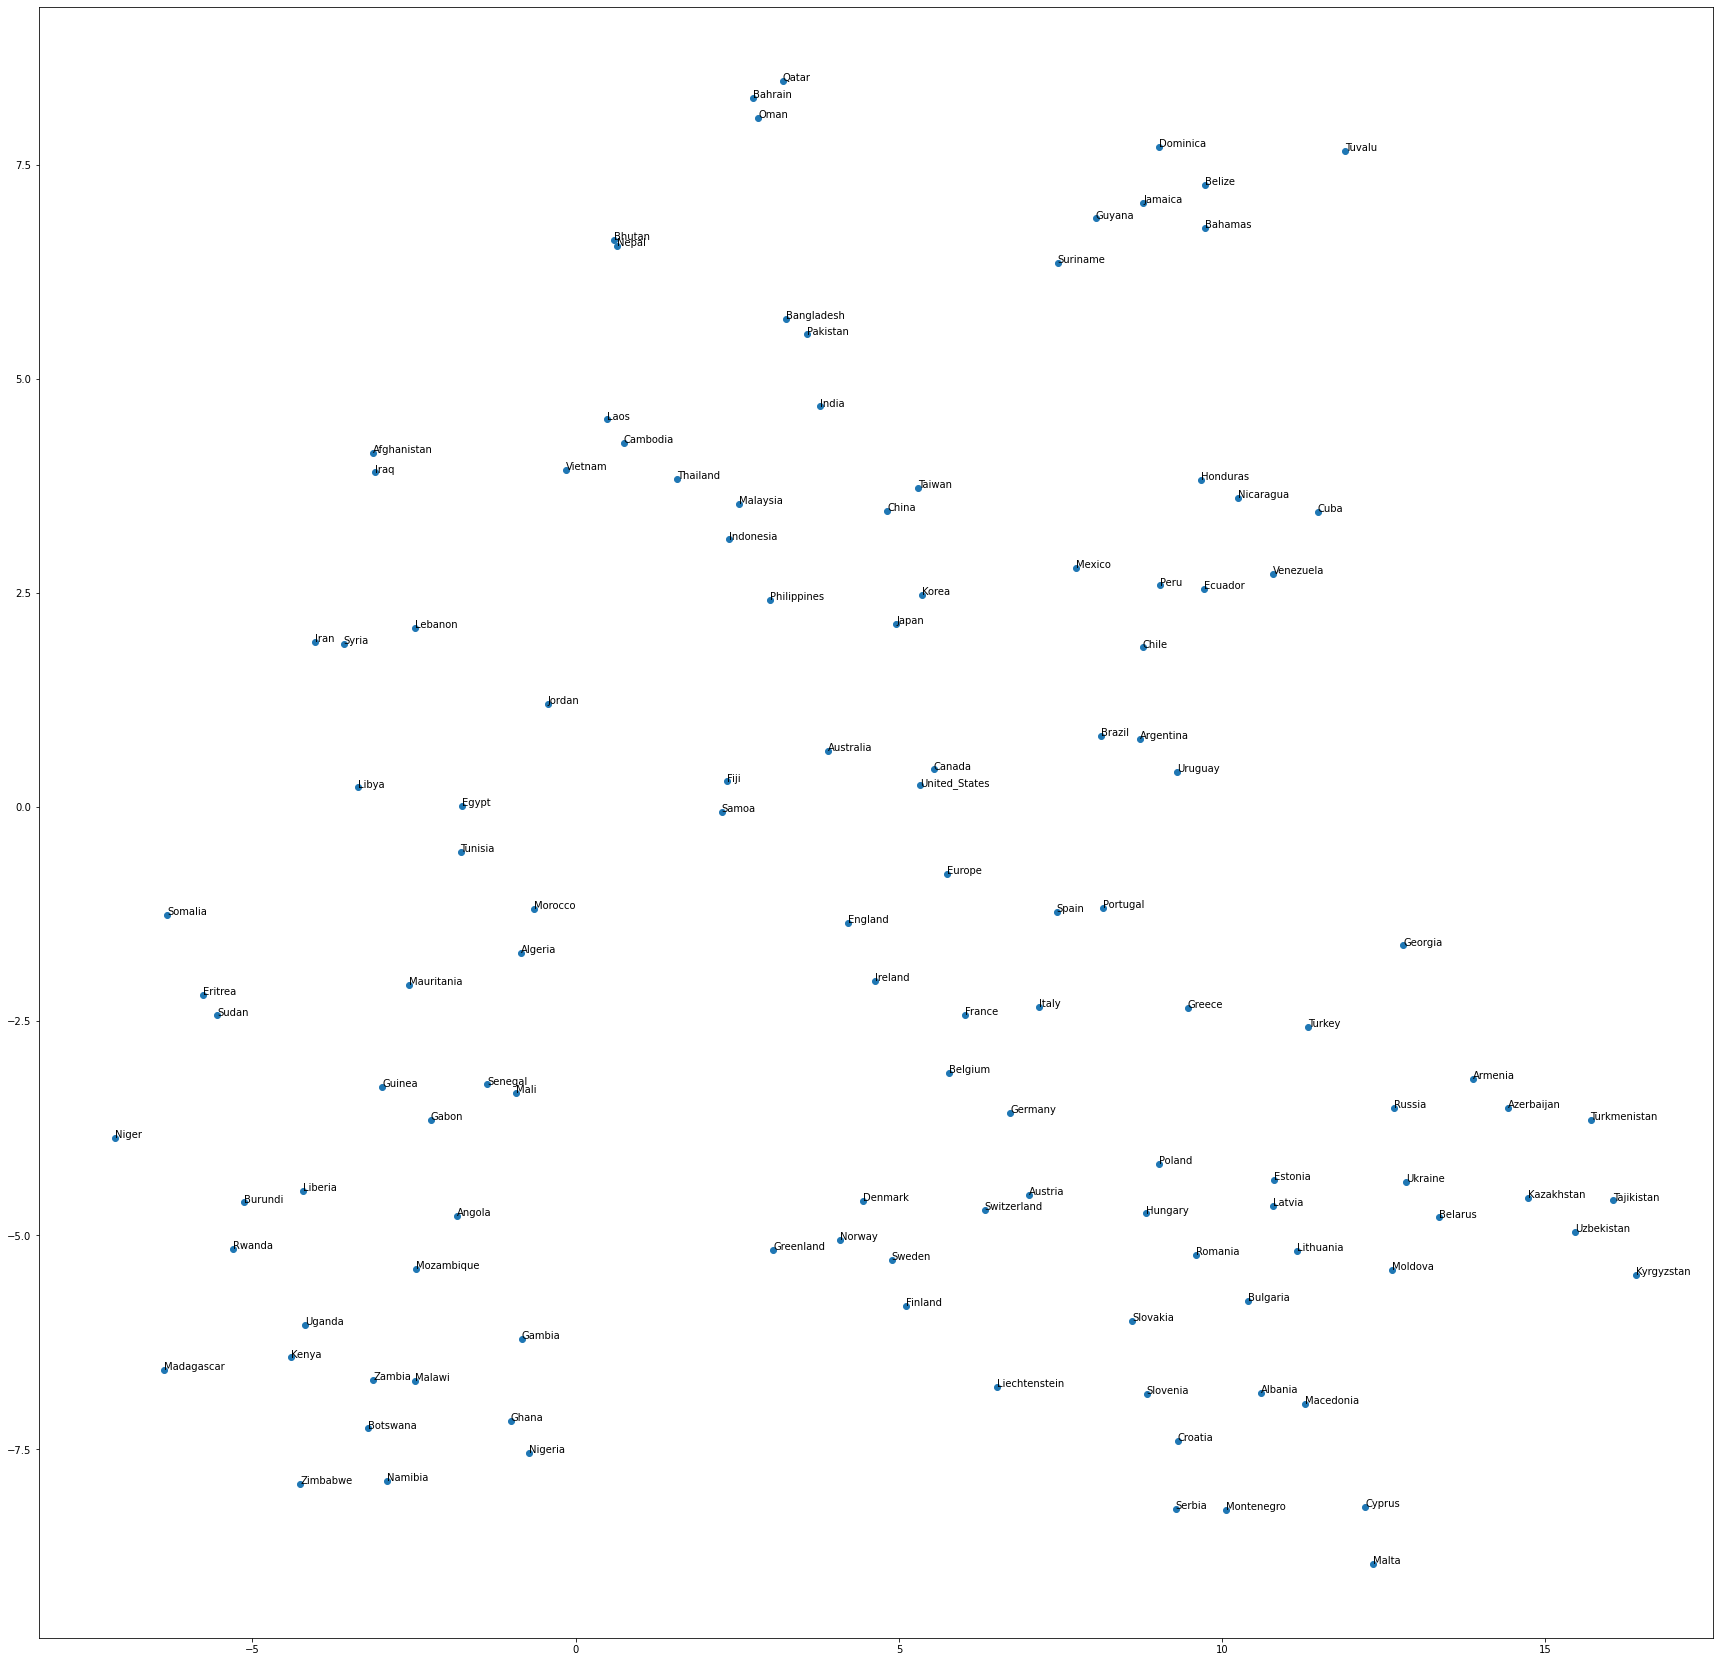

In [119]:
#https://kakedashi-engineer.appspot.com/2020/05/09/nlp100-ch7/

vec_embedded = TSNE(n_components = 2).fit_transform(vec)
#print(vec_embedded)
#vec_embedded = [(x1,y1),(x2,y2),......]

vec_embedded_t = list(zip(*vec_embedded))
#print(vec_embedded_t)
#vec_embedded_t = [(x1,x2,x3,.....),(y1,y2,y3,.....)]

fig,ax = plt.subplots(figsize=(30,30))
#実際にはここでグラフ化
plt.scatter(*vec_embedded_t)

#ここでタグをつける
for i,c in enumerate(country):
    ax.annotate(c, (vec_embedded[i][0],vec_embedded[i][1]))
plt.savefig("TSNE.png")